Plan:
1. Read the csv file and convert to a dataframe 
2. Basic Analysis - shape, size, data types, missing data
3. Data Cleaning - tokenization,remove stopwords, remove punctuations, Stemming/Lemmatization
4. vectorization - IF-DIF
5. Model - split data, Vectorization, ML models, hyper-parameter tuning, Metrics(Precision)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
#NLP Libraries
import string
import nltk
#nltk.download('wordnet')
import re

In [2]:
#Read the file
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#Remove last 3 columns and rename v1 to Label and v2 to Text
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1)
df.rename(columns = {'v1':'Label','v2':'Text'},inplace = True)
df.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


###  EDA

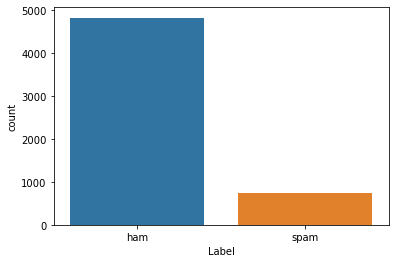

In [8]:
sns.countplot(df['Label'])

#This is an imbalanced dataset. We can over-sample spam or use algorithms like class balanced boosting and other techniques. Metrics like Precision, Recall must be used and Accuracy is not a valid metric for a imbalanced dataset. 

### DATA CLEANING

In [9]:
stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

In [10]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    text = [wn.lemmatize(word) for word in text]
    return text

In [11]:
df['Clean_Text'] = df['Text'].apply(lambda x: clean_text(x.lower()))
df.head()

,Label,Text,Clean_Text
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]"


### FEATURE ENGINEERING

#### CREATE NEW FEATURE FOR TEXT LENGTH

In [12]:
df['text_len'] = df['Text'].apply(lambda x: len(x)-x.count(" "))

#### NEW FEATURE - % OF PUNCTUATION

In [13]:
def count_punct(text):
    cnt = sum([1 for char in text if char in string.punctuation])
    return round(cnt/(len(text)-text.count(" ")),3)*100

In [14]:
df['%punct'] = df['Text'].apply(lambda x : count_punct(x))

In [15]:
df.head()

,Label,Text,Clean_Text,text_len,%punct
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n...",92,9.8
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",128,4.7
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]",39,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]",49,4.1


#### NEW FEATURE - % OF CAPITAL LETTERS

In [16]:
def count_capital(text):
    cnt = sum([1 for char in text if char.isupper()])
    return round(cnt/(len(text)-text.count(" ")),3)*100

In [17]:
df['%capital'] = df['Text'].apply(lambda x: count_capital(x))

In [18]:
df.head()

,Label,Text,Clean_Text,text_len,%punct,%capital
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n...",92,9.8,3.3
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",24,25.0,8.3
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",128,4.7,7.8
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]",39,15.4,5.1
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]",49,4.1,4.1


### Evaluation of new features

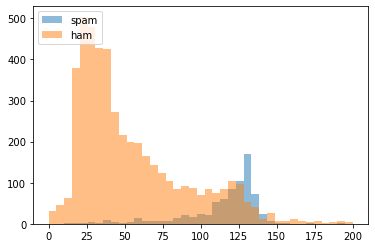

In [19]:
bins = np.linspace(0, 200, 40)

plt.hist(df[df['Label']=='spam']['text_len'], bins, alpha=0.5,  label='spam')
plt.hist(df[df['Label']=='ham']['text_len'], bins, alpha=0.5,  label='ham')
plt.legend(loc='upper left')
plt.show()

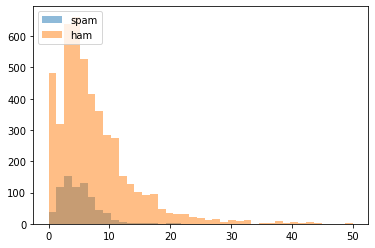

In [20]:
bins = np.linspace(0, 50, 40)

plt.hist(df[df['Label']=='spam']['%punct'], bins, alpha=0.5,  label='spam')
plt.hist(df[df['Label']=='ham']['%punct'], bins, alpha=0.5,  label='ham')
plt.legend(loc='upper left')
plt.show()

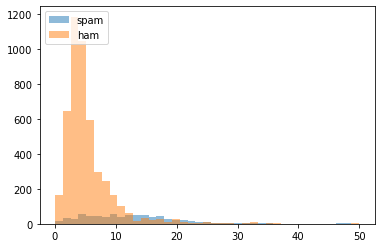

In [21]:
bins = np.linspace(0, 50, 40)

plt.hist(df[df['Label']=='spam']['%capital'], bins, alpha=0.5,  label='spam')
plt.hist(df[df['Label']=='ham']['%capital'], bins, alpha=0.5,  label='ham')
plt.legend(loc='upper left')
plt.show()

Out of the three features, text length is different for spam and ham according to the distribution. Spam can be assumed to contain more text length than ham which can be used as a predictor.

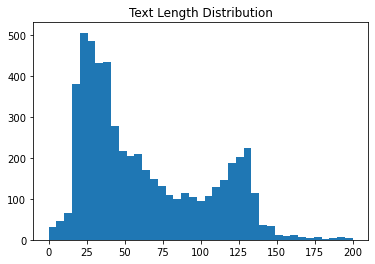

In [22]:
bins = np.linspace(0,200,40)
plt.hist(df['text_len'],bins)
plt.title('Text Length Distribution')
plt.show()

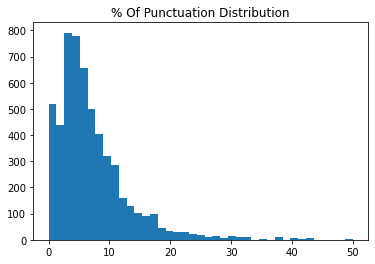

In [23]:
bins = np.linspace(0,50,40)
plt.hist(df['%punct'],bins)
plt.title("% Of Punctuation Distribution")
plt.show()

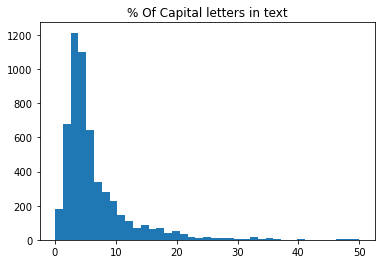

In [24]:
bins = np.linspace(0,50,40)
plt.hist(df['%capital'],bins)
plt.title("% Of Capital letters in text")
plt.show()

Text Length feature is bimodal and doesn't have a normal distribution. Transformations can be applied to %punctuations and %capital which can convert the positively skewed distribution to normal distribution.

#### Transformations

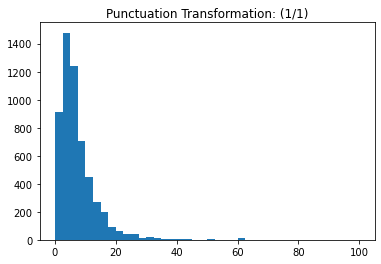

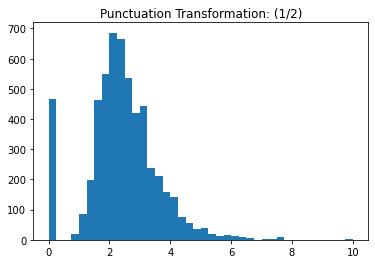

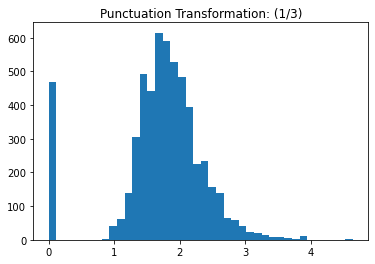

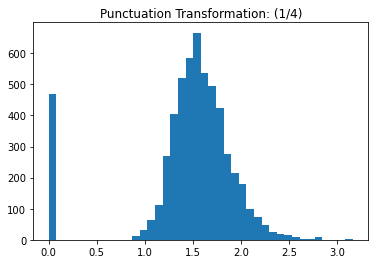

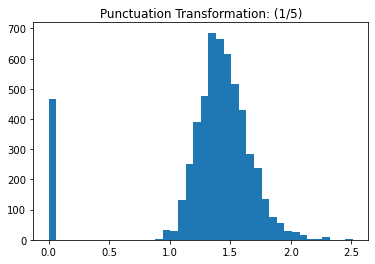

In [25]:
#BOX COX Transformation
for i in  [1,2,3,4,5]:
    plt.hist((df['%punct'])**(1/i),bins = 40)
    plt.title("Punctuation Transformation: (1/{})".format(str(i)))
    plt.show()

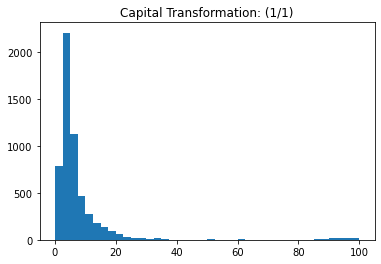

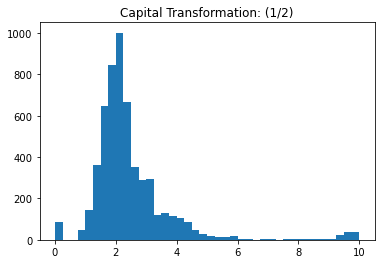

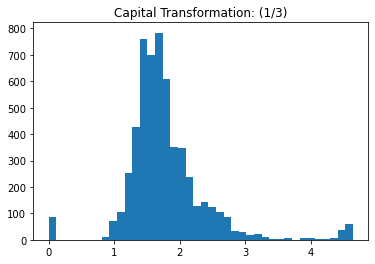

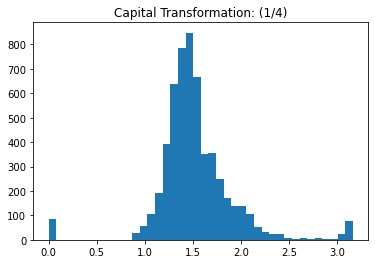

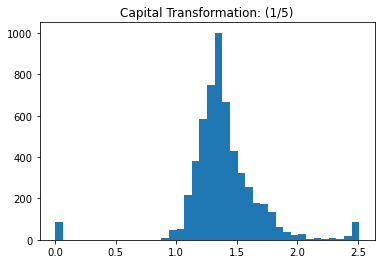

In [26]:
for i in  [1,2,3,4,5]:
    plt.hist((df['%capital'])**(1/i),bins = 40)
    plt.title("Capital Transformation: (1/{})".format(str(i)))
    plt.show()

For both the columns, 1/4 and 1/5 gave better distribution

In [27]:
### Applying Transformations
df['tr_%punct'] = np.power(df['%punct'],(1/4))
df['tr_%capital'] = np.power(df['%capital'],(1/4))

### TEST TRAIN SPLIT

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[['Text','text_len','%punct','%capital']],df['Label'],test_size = 0.2)

In [30]:
x_train.head()

,Text,text_len,%punct,%capital
5225,Smile in Pleasure Smile in Pain Smile when tro...,116,1.7,16.4
635,Me n him so funny...,16,18.8,6.2
3404,"Jus chillaxin, what up",19,5.3,5.3
4432,Can u look 4 me in da lib i got stuff havent f...,43,2.3,2.3
1516,I need to come home and give you some good lov...,41,7.3,2.4


### VECTORIZING

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf_vect = TfidfVectorizer(analyzer = clean_text)
tfidf_vect_fit = tfidf_vect.fit(x_train['Text'])

tfidf_train = tfidf_vect_fit.transform(x_train['Text'])
tfidf_test = tfidf_vect_fit.transform(x_test['Text'])

x_train_vect = pd.concat([x_train[['text_len','%punct','%capital']].reset_index(drop=True),
                          pd.DataFrame(tfidf_train.toarray())],axis = 1)
x_test_vect = pd.concat([x_test[['text_len','%punct','%capital']].reset_index(drop=True),
                          pd.DataFrame(tfidf_test.toarray())],axis = 1)
x_train_vect.head()

,text_len,%punct,%capital,0,1,2,3,4,5,6,...,9721,9722,9723,9724,9725,9726,9727,9728,9729,9730
0,116,1.7,16.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16,18.8,6.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,5.3,5.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,43,2.3,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41,7.3,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
x_test_vect.head()

,text_len,%punct,%capital,0,1,2,3,4,5,6,...,9721,9722,9723,9724,9725,9726,9727,9728,9729,9730
0,91,6.6,3.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,306,6.2,4.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39,7.7,7.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,120,2.5,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,124,5.6,7.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
print(x_train_vect.shape)
print(x_test_vect.shape)

(4457, 9734)
(1115, 9734)


### Machine Learning Models

## RANDOM FOREST

In [35]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [36]:
def Print_results(results):
    print('Best Params: {} \n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean,std,params in zip(means,stds,results.cv_results_['params']):
        print('{}(+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

In [38]:
RF = RandomForestClassifier()
RF_parameters = {'n_estimators':[10,100,150,200,250],'max_depth':[30,90,100,120,None]}
RF_cv = GridSearchCV(RF,RF_parameters,cv = 5)
RF_cv.fit(x_train_vect, y_train)
pd.DataFrame(RF_cv.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,8.843026,0.209172,0.185113,0.002814,90,200,"{'max_depth': 90, 'n_estimators': 200}",0.980942,0.964126,0.970819,0.968575,0.984287,0.973750,0.007626,1
12,6.924109,0.064463,0.171020,0.001225,100,150,"{'max_depth': 100, 'n_estimators': 150}",0.980942,0.965247,0.967452,0.970819,0.983165,0.973525,0.007220,2
11,4.776341,0.051389,0.151269,0.006869,100,100,"{'max_depth': 100, 'n_estimators': 100}",0.979821,0.966368,0.967452,0.969697,0.984287,0.973525,0.007186,2
16,5.036834,0.110692,0.150841,0.017393,120,100,"{'max_depth': 120, 'n_estimators': 100}",0.976457,0.966368,0.973064,0.968575,0.982043,0.973301,0.005601,4
9,10.776544,0.114930,0.198977,0.001425,90,250,"{'max_depth': 90, 'n_estimators': 250}",0.980942,0.961883,0.970819,0.970819,0.982043,0.973301,0.007450,5


In [39]:
rf = RandomForestClassifier(n_estimators=200, max_depth=90, n_jobs=-1)

start = time.time()
rf_model = rf.fit(x_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(x_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 3.488 / Predict time: 0.362 ---- Precision: 1.0 / Recall: 0.893 / Accuracy: 0.987


Model was evaluated with various types of transformations on %punct and %capital columns and different hyperparameter
values. Best model was created using Random Forest Classifier with n_estimators equal to 200 and 90 max_depth 
without any transformations. 

In Spam Classification, importance is given to Precision as we donot want any important texts to be sent to spam.
The Random Forest model evaluation for the test data was good with a Precision of 1.0 and Recall 0.893.